In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from datetime import datetime 
from sympy import *
from matplotlib.dates import DateFormatter
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from collections import Counter

In [3]:
# data visualization
data = pd.read_csv("temp_datalab_records_linkedin_company.csv", low_memory = False)
data = data[['company_name',"followers_count","employees_on_platform",'industry',"date_updated","date_added"]]
data = data.dropna(axis = 0)
data.describe()
print('Data dimension:',data.shape)
print('Number if industries:',len(np.unique(data.industry.astype(str))))
print('Industies:',np.unique(data.industry.astype(str)))

Data dimension: (2389931, 6)
Number if industries: 140
Industies: ['Accounting' 'Airlines/Aviation' 'Apparel & Fashion'
 'Apparel &amp; Fashion' 'Automotive' 'Aviation & Aerospace'
 'Aviation &amp; Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Building Materials' 'Business Supplies and Equipment' 'Capital Markets'
 'Chemicals' 'Civil Engineering' 'Commercial Real Estate'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Construction' 'Consumer Electronics'
 'Consumer Goods' 'Consumer Services' 'Cosmetics' 'Dairy'
 'Defense & Space' 'Defense &amp; Space' 'Design' 'E-Learning'
 'Education Management' 'Electrical/Electronic Manufacturing'
 'Entertainment' 'Environmental Services' 'Events Services'
 'Executive Office' 'Facilities Services' 'Farming' 'Financial Services'
 'Fine Art' 'Food & Beverages' 'Food &amp; Beverages' 'Food Production'
 'Furniture' 'Gambling & Casinos' 'Gambling

In [4]:
# feature extraction yearly increasing rate:

shrinked_updated_date=[]
for dataset in data.date_updated:
    dataset=dataset[0:4]
    shrinked_updated_date.append(dataset)
data['shrinked_updated_date']=shrinked_updated_date
#print(data)

count=0
my_dict1={}
my_dict2={}
my_dict3={}
my_dict4={}
for company in data.company_name.unique():
    #print(company)
    count=count+1
    print(count)

    temp1=data[data.company_name==company]
    #print(temp1['industry'].get(temp1['industry'].keys()[0]))
    industry_name=temp1['industry'].get(temp1['industry'].keys()[0])
    
    comp_dates=[]
    for date in temp1['date_updated']:
        date = date[0:4]
        comp_dates.append(date)

    #print(np.unique(np.array(comp_dates)))
    #print(comp_dates.shape)
    
    followerC=[]
    employeeC=[]
    shrink_dates=[]
    for date in np.unique(np.array(comp_dates)):
        #print(date)
        #print(temp1.date_updated)
        shrink_dates.append(date)
        
        temp2=temp1[temp1.shrinked_updated_date==date]
        followerC.append(str(int(np.mean(temp2['followers_count']))))
        employeeC.append(str(int(np.mean(temp2['employees_on_platform']))))
    
    followerC_rate=np.zeros(len(followerC))
    employeeC_rate=np.zeros(len(employeeC))
    follower_feature=np.zeros(len(followerC)-1)
    employee_feature=np.zeros(len(employeeC)-1)
    
    for i in range(len(followerC)-1):
        follower_feature[i]=np.divide(np.subtract(int(followerC[i+1]),int(followerC[i])),int(followerC[i]))
        employee_feature[i]=np.divide(np.subtract(int(employeeC[i+1]),int(employeeC[i])),int(employeeC[i]))
    
    my_dict1[company]=follower_feature
    my_dict2[company]=employee_feature
    my_dict3[company]=shrink_dates
    my_dict4[company]=industry_name
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663


/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863


/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189


In [5]:
# data test
print(my_dict3['Adobe'])
print(my_dict2['Adobe'])
print(my_dict1['Adobe'])
print(my_dict4['Adobe'])
#print(len(my_dict1.keys()))
#for key in my_dict1.keys():
 #   print(len(my_dict1.get(key)))

['2015', '2016', '2017', '2018']
[0.08884445 0.13065722 0.07715512]
[0.17815792 0.21405768 0.27338497]
Computer Software


In [6]:
# fill in empty features
full_dates=my_dict3['Adobe']
full_dates=full_dates[1:]
#print(len(full_dates))
full_dict1={}
full_dict2={}
full_dict3={}

for key in my_dict3.keys():
    temp3=my_dict3.get(key)
    #print(len(temp3))
    if len(temp3)>1:
        temp3=temp3[1:]
    else: continue
        
    temp2=my_dict2.get(key)
    temp1=my_dict1.get(key)
    #temp4=my_dict4.get(key)
   # print((temp4))
    
    T2=np.zeros(len(full_dates))
    T1=np.zeros(len(full_dates))
    #T4=[]#np.zeros(len(full_dates))
    #print(len(T1))
    
    #print(range(len(full_dates)-1))
    #print(temp3)

    for i in range(len(full_dates)):
        #print(i)
        if full_dates[i] in temp3:
            Ind=temp3.index(full_dates[i])
            #print(Ind)
            T2[i]=temp2[Ind]
            T1[i]=temp1[Ind]
            #print(temp4[Ind])
            #T4.append(temp4[Ind])
            
    full_dict1[key]=T1
    full_dict2[key]=T2
    #full_dict3[key]=T4
    
#print(len(full_dict1))
#print(full_dict1['Alcon'])
#print(list(full_dict1.values()))
#print((full_dict1.values()))
X=np.concatenate((np.array(list(full_dict1.values())),np.array(list(full_dict2.values()))),axis=1)
X1=np.array(list(full_dict1.values()))
X2=np.array(list(full_dict2.values()))
print(X.shape)
print(X1.shape)
print(X2.shape)

(4653, 6)
(4653, 3)
(4653, 3)


(4653, 6)
['2016', '2017', '2018']
[0.02519644 0.09081098 0.15297487]


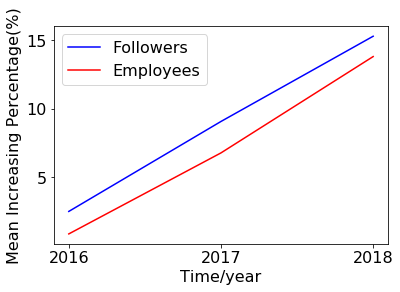

In [7]:
# data test
full_dates=my_dict3['Adobe']
X=np.nan_to_num(X)
print((X.shape))
print(full_dates[1:])
print((np.mean(X[:,0:3],axis=0)))
#plt.xticks(np.arange(len(full_dates), step=3),rotation='vertical')
plt.rcParams.update({'font.size': 16})
plt.plot(full_dates[1:],np.multiply(np.mean(X[:,0:3],axis=0),100),'b',label='Followers')
plt.xlabel('Time/year')
plt.ylabel('Mean Increasing Percentage(%)')
#plt.xticks(np.arange(len(full_dates), step=3),rotation='vertical')
plt.plot(full_dates[1:],np.multiply(np.mean(X[:,3:],axis=0),100),'r',label='Employees')
plt.legend()
plt.show()

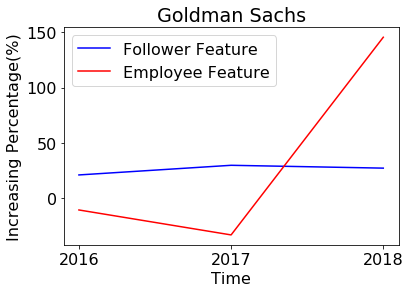

dict_keys(['Goldman Sachs', 'United Technologies', 'Novo Nordisk', "Lowe's Companies, Inc.", 'UnitedHealth Group', 'McKesson', 'BBVA', 'IBM', 'MasterCard', 'Sanofi', 'Novartis', 'Cisco', 'GE', 'RBC', 'Priceline.com', 'Philip Morris International', 'Intel Corporation', 'ConocoPhillips', 'TJ Maxx', 'Ford Motor Company', 'The Walt Disney Company', 'Procter & Gamble', 'BHP Billiton', "McDonald's Corporation", 'Amazon', 'Banco Santander', 'The Dow Chemical Company', 'Apple', 'TOTAL', 'HSBC', '3M', 'Simon Property Group', 'Google', 'Honeywell', 'Toyota Motor Corporation', 'Visa', 'Walmart', 'Texas Instruments', 'Duke Energy Corporation', 'Biogen', 'Chevron', 'Hewlett-Packard', 'Eli Lilly and Company', 'Oracle', 'Teva Pharmaceuticals', 'Morgan Stanley', 'Ambev', 'U.S. Bank', 'Starbucks', 'Anheuser-Busch InBev', 'BlackRock', 'Citi', 'Gilead Sciences', 'Celgene', 'Vodafone', 'Pfizer', 'The Home Depot', 'ExxonMobil', 'Prudential Financial', 'Costco Wholesale', 'Express Scripts', 'Scotiabank', 'T

In [17]:
# data test
full_dates=my_dict3['Adobe']
Ind0=1
plt.rcParams.update({'font.size': 16})
#plt.xticks(np.arange(len(full_dates), step=1),rotation='vertical')
plt.plot(full_dates[1:],np.multiply((X[Ind0,0:3]),100),'b',label='Follower Feature')
plt.xlabel('Time')
plt.ylabel('Increasing Percentage(%)')
plt.plot(full_dates[1:],np.multiply((X[Ind0,3:]),100),'r',label='Employee Feature')
plt.legend()
plt.title('Goldman Sachs')
plt.show()
print(my_dict1.keys())

In [13]:
# clustering companies according to yearly increasing rates of followers:
X=np.nan_to_num(X)
X1=np.nan_to_num(X1)
X2=np.nan_to_num(X2)
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans[2000:2500])
print(full_dates)

[2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 4 2 1 2 2 2 1 2 1 2 4 2 2 1 1 1 1 2 0 1 1 1
 1 1 0 2 2 1 2 1 2 2 2 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2
 1 1 2 2 1 2 1 2 2 1 1 2 1 1 4 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 4 2 1
 4 1 3 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 1 2 1 2 1 2 1 0 2 2 1 1 1 1 1 1 1 2 2 0 2 2 2 2 1 1 1 1 2 1 4 1 2 2 2 2 2
 1 2 2 1 1 1 2 2 2 2 0 1 1 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 1
 2 0 1 2 1 1 2 1 1 0 1 2 1 1 2 1 1 2 2 1 2 2 1 1 2 2 2 1 1 2 2 2 2 1 1 4 2
 1 1 1 2 1 1 2 2 1 1 0 2 2 0 2 1 1 2 1 1 1 1 2 2 2 1 2 2 1 2 1 2 1 1 4 1 2
 1 2 4 1 2 1 2 2 2 1 1 1 2 2 2 0 3 1 2 1 3 1 2 1 2 2 0 1 4 1 2 2 1 2 0 2 2
 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 1 2 4 1 2 2 1 1 1 2 3 1 1 0 2 0 1 2 2 1 1 1 2 1 1 1 2 2 1 2 0 2 2 1
 2 1 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 1 1 2 1 2 2 1 4 4 0 2 1 2 1 2 2 1 2 0 2
 1 1 2 1 1 1 2 0 2 2 2 1 1 1 2 4 2 1 2 1 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 2 1
 2 1 2 1 1 4 1 1 4 2 1 2 

4653
111
37
37
0.6


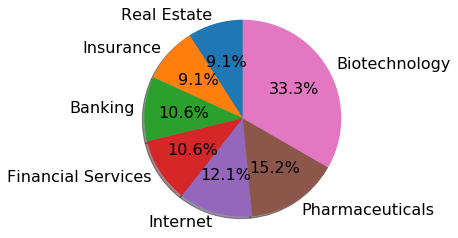

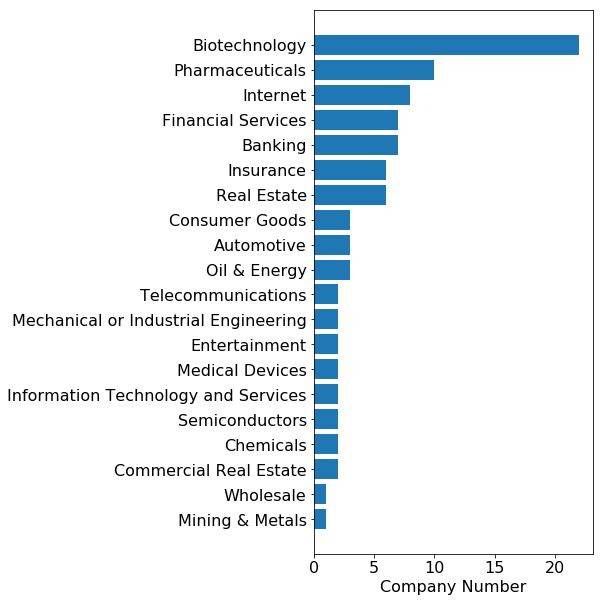

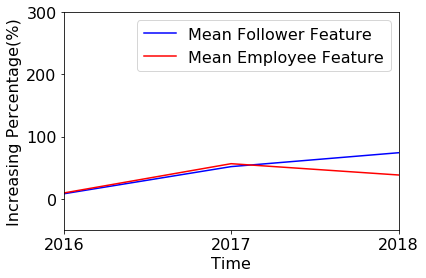

2718
500
1000
1500
2000
2500
128
128
0.35737946264262055


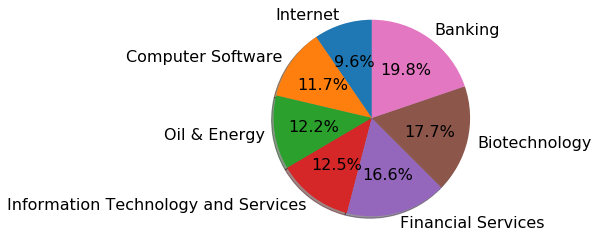

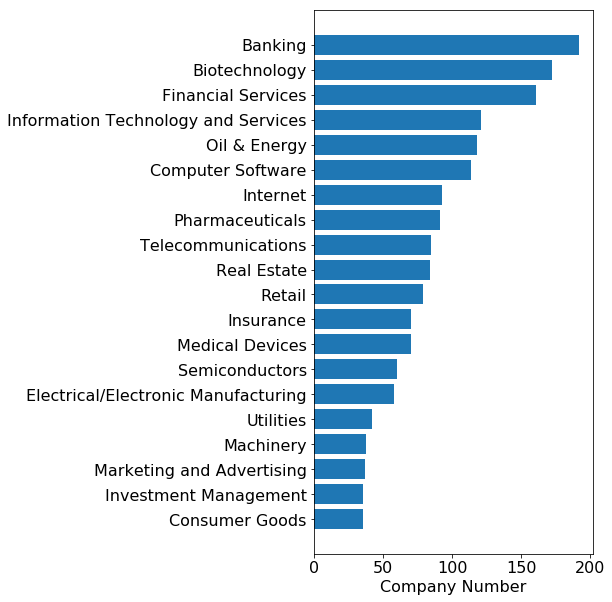

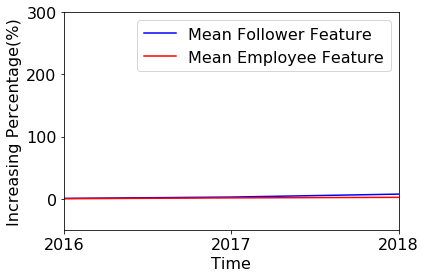

1664
500
1000
1500
109
109
0.3577871316897174


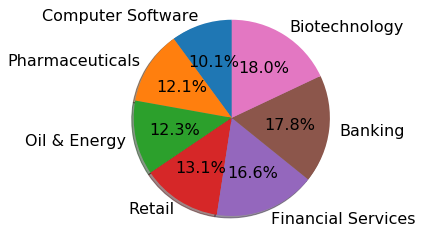

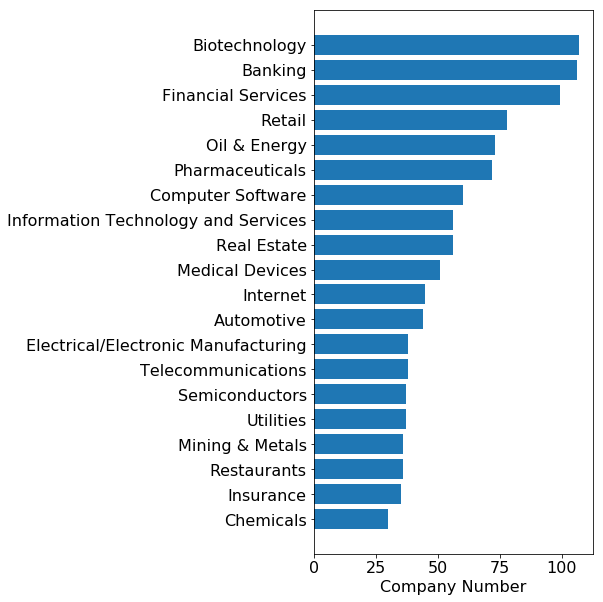

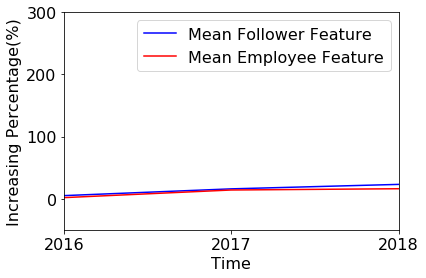

34
24
24
0.48484848484848486


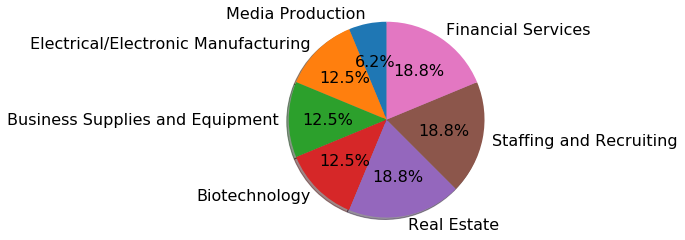

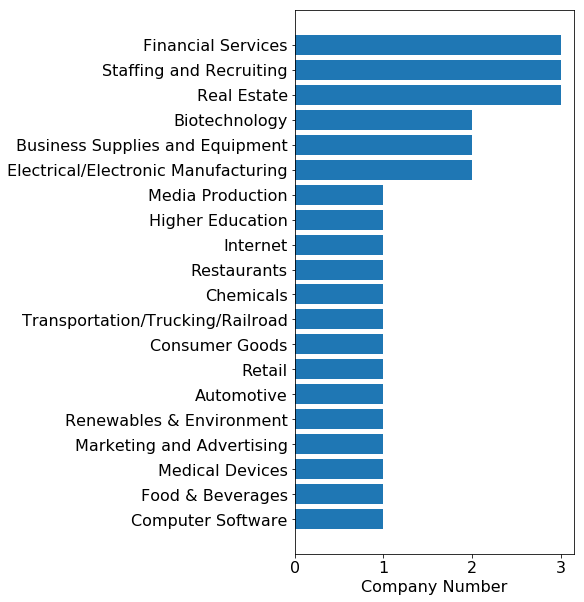

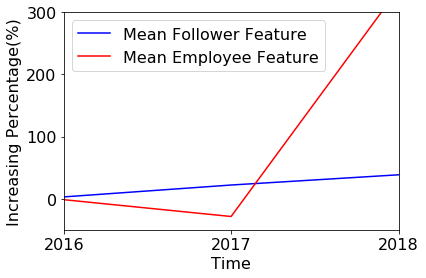

126
49
49
0.408


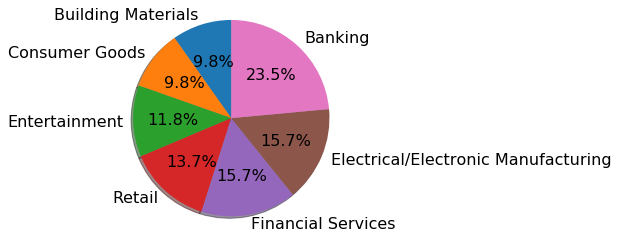

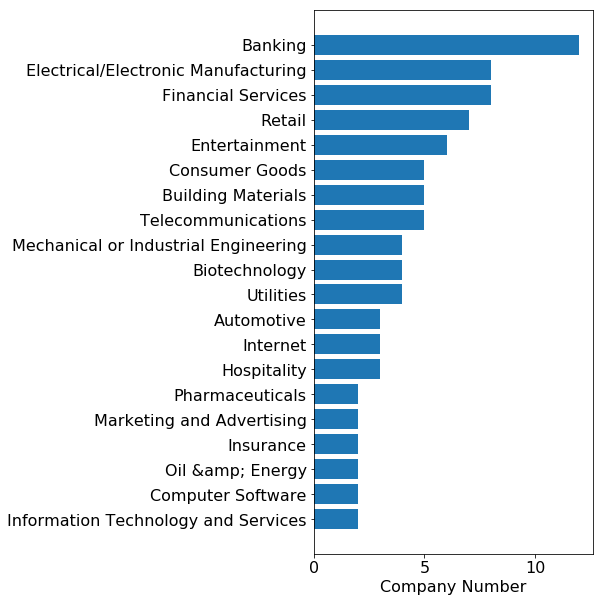

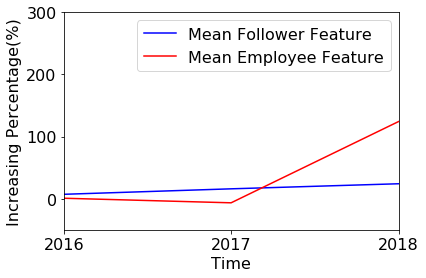

In [26]:
print(len(full_dict1.keys()))
freqN=7
Ukeys=np.array(full_dict1.keys())
#print((np.array(y_kmeans.shape)))
y_kmeans=np.array(y_kmeans)
for vae in np.unique(y_kmeans):
    temp1=X[y_kmeans==vae]
    Ind = np.where(y_kmeans == vae)
    print(len(Ind[0]))
    keyshere=[]
    for i in range(len(Ind[0])-1):
        tmp=list(Ukeys.tolist())[Ind[0][i]]
        keyshere.append(tmp)
    keysH=np.unique(keyshere)
    #print(keysH)
    tmp2=[]
    cnt=0
    for key in keysH:
        cnt=cnt+1
        tmp0=(data[data.company_name==key])
        #print(tmp0['industry'])
        tmp1 =(tmp0.industry.values)[0]
        if cnt%500 == 0:
            print(cnt)
        tmp2.append(tmp1)
    counts=Counter(tmp2)
    
    #print(top5.keys)
    #import operator
    #sorted_counts=sorted(counts.items(),key=operator.itemgetter(0))
    #print("!!!!!!")
    #print(sorted_counts.keys)
    #break
    #labels = list(counts.keys())[0:5]
    #sizes = list(counts.values())[0:5]
    n=len(tmp2)-1
    topall = counts.most_common()[:-n-1:-1]
    labelsall = []
    sizesall = []
    for i in range(len(topall)):
        labelsall.append(topall[i][0])
        sizesall.append(topall[i][1])
    print(len(labelsall))
    print(len(sizesall))
        

    sum_1=0
    sum_2=0
    
    for num in sizesall[len(labelsall)-freqN:len(labelsall)]:
        sum_1 += num
        
    for num in sizesall:
        sum_2 += num
        
    print(sum_1/sum_2)
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizesall[len(labelsall)-freqN:len(labelsall)], labels=labelsall[len(labelsall)-freqN:len(labelsall)], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
    plt.rcParams.update({'font.size': 16})
    plt.show()
    
    
    #x = np.arange(len(list(counts.values())))
    x = np.arange(len(topall[0:20]))
    #plt.bar(x, (counts.values()))
    plt.figure(figsize=(5,10))
    plt.barh(x,sizesall[len(sizesall)-20:len(sizesall)])
    #plt.xticks(x+.5, (counts.keys()))
    plt.yticks(x+.5,labelsall[len(sizesall)-20:len(sizesall)])
    plt.yticks(np.arange(len(x), step=1),rotation='horizontal')
    plt.xlabel('Company Number')
    plt.rcParams.update({'font.size': 16})
    #plt.axis([0.0,300,-1,30])
    plt.show()
    
        #print(np.unique(tmp0.industry))
        #tmp1=tmp0['industry']
        #tmp2.append(tmp1)
    #print(np.unique(tmp2))
    
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,0:3],axis=0),100),'b',label='Mean Follower Feature')
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,3:],axis=0),100),'r',label='Mean Employee Feature')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Increasing Percentage(%)')
    plt.rcParams.update({'font.size': 16})
    plt.axis([0.0,2.0,-50,300])
    plt.show()
   # print(temp1.shape)


In [21]:
#plt.barh(x,sizesall[len(sizesall)-30:len(sizesall)])
print(len(sizesall))

24
